In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=100):
        self.lr = learning_rate
        self.epochs = n_iter
        self.wt = None
        self.bi = None

    def init_weight_bias(self, num_x):
        self.wt = np.zeros(num_x)
        self.bi = 0

    def neuron(self, x):
        return np.dot(self.wt, x) + self.bi

    def activation_func(self, x):
        return 1 if x >= 0 else 0

    def propagate(self, x):
        linear_output = self.neuron(x)
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def calc_error(self, y_target, y_pred):
        return y_target - y_pred

    def update_weight_bias(self, x, yt, yp):
        updt = self.lr * self.calc_error(yt, yp)
        self.wt += updt * x
        self.bi += updt

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.init_weight_bias(n_features)

        for i in range(self.epochs):
            all_correct = True
            for idx, x in enumerate(X):
                y_predicted = self.propagate(x)
                self.update_weight_bias(x, y[idx], y_predicted)
                # Check if the prediction was incorrect
                if y_predicted != y[idx]:
                    all_correct = False
            # If all predictions are correct, stop training
            if all_correct:
                print(f"Training stopped early at epoch {i + 1}")
                break
            self.visualize(X, y)

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self.propagate(x))
        return np.array(predictions)

    # Create a mesh grid for plotting decision boundary
    def visualize(self, X, y):
        plt.figure(figsize=(3, 3))
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
        )
        # Predict on the mesh grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plotting
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker="o")
        plt.title("Perceptron Decision Boundary")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

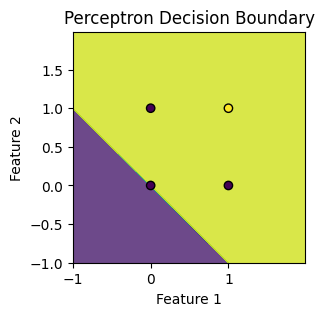

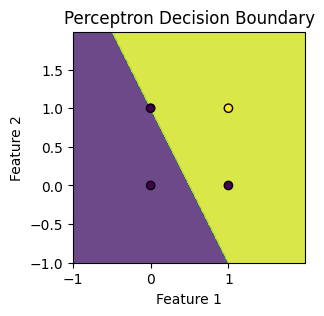

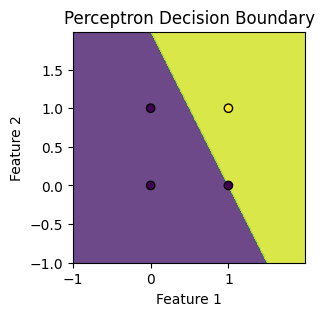

Training stopped early at epoch 4
[0 0 0 1]


In [21]:
# Example usage
if __name__ == "__main__":
    # Sample data (AND problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND is linearly separable

    perceptron = Perceptron(learning_rate=0.1, n_iter=10)
    perceptron.fit(X, y)
    predictions = perceptron.predict(X)
    print(predictions)

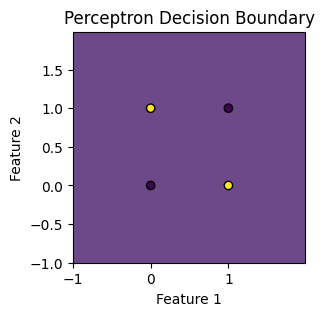

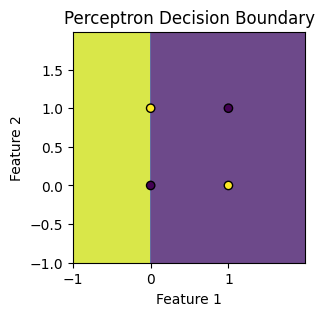

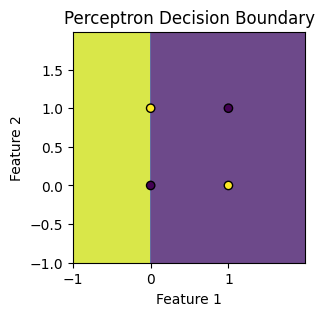

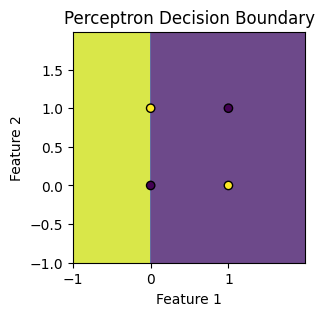

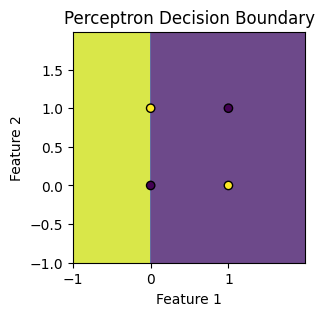

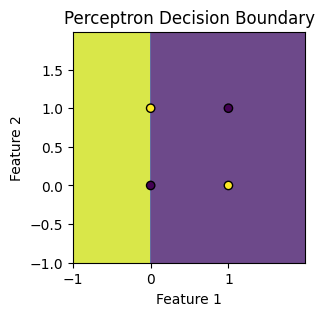

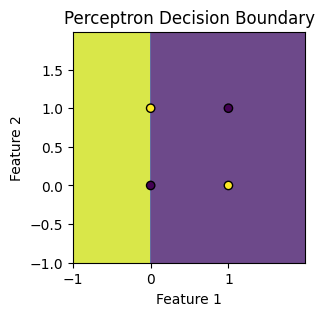

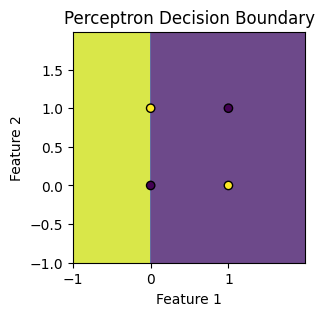

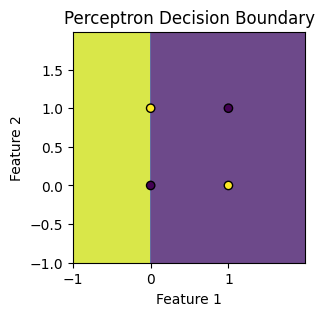

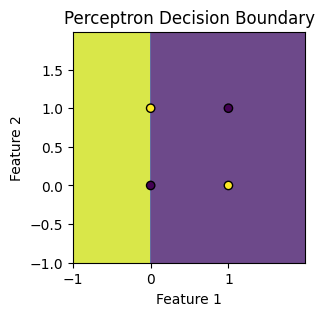

[1 1 0 0]


In [22]:
# Example usage
if __name__ == "__main__":
    # Sample data (XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])  # XOR is not linearly separable

    perceptron = Perceptron(learning_rate=0.1, n_iter=10)
    perceptron.fit(X, y)
    predictions = perceptron.predict(X)
    print(predictions)